<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ вакансий из HeadHunter
   

In [1]:
import pandas as pd
import psycopg2
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')


In [ ]:
connection = psycopg2.connect(
    dbname=DBNAME,
    user=USER,
    host=HOST,
    password=PASSWORD,
    port=PORT
)

In [45]:
# Закрываем соеденение
connection.close()

# Юнит 3. Предварительный анализ данных

1. Напишите запрос, который посчитает количество вакансий в нашей базе (вакансии находятся в таблице vacancies). 

In [92]:
# текст запроса
query_3_1 = f'''
SELECT
    COUNT(ID) AS "Количество вакансий"  /*выбираем столбец ID, задаём ему алиас Количество вакансий*/
FROM
    public.vacancies
            '''

In [93]:
# результат запроса
df = pd.read_sql_query(query_3_1, connection) # используем метод read_sql_query, чтобы получить результаты запроса сразу в виде датафрейма 
df

,Количество вакансий
0,49197


2. Напишите запрос, который посчитает количество работодателей (таблица employers). 

In [94]:
# текст запроса
query_3_2 = f'''
SELECT
    COUNT(ID) "Количество работодателей" /*выбираем столбец ID, задаём ему алиас Количество работодателей*/
FROM
    public.employers
            '''

In [95]:
# результат запроса
df = pd.read_sql_query(query_3_2, connection) # используем метод read_sql_query, чтобы получить результаты запроса сразу в виде датафрейма
df

,Количество работодателей
0,23501


3. Посчитате с помощью запроса количество регионов (таблица areas).

In [96]:
# текст запроса
query_3_3 = f'''
SELECT
    COUNT(ID) "Количество регионов" /*выбираем столбец ID, задаём ему алиас Количество регионов*/
FROM
    public.areas
            '''

In [97]:
# результат запроса
df = pd.read_sql_query(query_3_3, connection) # используем метод read_sql_query, чтобы получить результаты запроса сразу в виде датафрейма
df

,Количество регионов
0,1362


4. Посчитате с помощью запроса количество сфер деятельности в базе (таблица industries).

In [98]:
# текст запроса
query_3_4 = f'''
SELECT
    COUNT(ID) "Количество сфер деятельности" /*выбираем столбец ID, задаём ему алиас Количество сфер деятельности*/
FROM
    public.industries
            '''

In [99]:
# результат запроса
df = pd.read_sql_query(query_3_4, connection) # используем метод read_sql_query, чтобы получить результаты запроса сразу в виде датафрейма
df

,Количество сфер деятельности
0,294


***

### Выводы по предварительному анализу данных
Количество вакансий превышает количество работодателей более, чем в 2 раза, из чего можно сделать вывод, что есть существенное количество работодателей, у которых открыто одновременно несколько вакансий, в основном информация нужна для понятия колличества строк.

# Юнит 4. Детальный анализ вакансий

1. Напишите запрос, который позволит узнать, сколько (cnt) вакансий в каждом регионе (area).
Отсортируйте по количеству вакансий в порядке убывания.

In [111]:
# текст запроса
query_4_1 = f'''
SELECT
    COUNT(v.ID) cnt,                        -- выбираем столбец ID, задаём ему алиас cnt                  
    a.name area                             -- выбираем столбец name в таблице areas, задаём ему алиас area
FROM
    public.vacancies v
LEFT JOIN public.areas a ON v.area_id=a.ID  -- соединяем так, по скольку в запросе было количество вакансий, что бы ни одна не пропала, даже если регион не указан 
GROUP BY 2
ORDER BY 1 DESC
LIMIT 12                                    -- показываем для наглядности только первые 12 городов. с колличеством вакансий больше 1000
            '''

In [112]:
# результат запроса
df = pd.read_sql_query(query_4_1, connection) # используем метод read_sql_query, чтобы получить результаты запроса сразу в виде датафрейма
display(df)

# Создаем круговую диаграмму, из первых 12 городов, где колличестов вакансий больше 1000
fig = px.pie(
    df,
    values='cnt',
    names='area',
    height=600,
    width=700,
    title='Колличество вакансий в городах в процентах',
)
fig.show()                                    


,cnt,area
0,5333,Москва
1,2851,Санкт-Петербург
2,2112,Минск
3,2006,Новосибирск
4,1892,Алматы
5,1698,Екатеринбург
6,1670,Нижний Новгород
7,1415,Казань
8,1301,Краснодар
9,1144,Самара


<img src = https://raw.githubusercontent.com/Balantre/New_octopus/main/project_2/graph/1.png >


##### Выводы:
- Изходя из представленных данных, можно сделать вывод, что вакансии не только есть в РФ, но и странах СНГ 
- Так же, самое большое колличество вакансий в крупных мегаполисах, то есть чем крупнее город тем больше там вакансий
- Возникает вопрос влияет ли количество вакансий и населения, на ЗП в данных городах (см Допоплнительное исследование)

2. Напишите запрос, чтобы определить у какого количества вакансий заполнено хотя бы одно из двух полей с зарплатой.

In [113]:
# текст запроса
query_4_2 = f'''
SELECT
    COUNT(ID) "Колличество вакансий с ЗП" -- выбираем столбец ID, задаём ему алиас "Колличество вакансий с ЗП" 
FROM
    vacancies
WHERE salary_from IS NOT NULL             -- Прописываем условия, не должно содержать NULL, т.е. должно быть заполнено
OR salary_to IS NOT NULL                  -- Прописываем условия, не должно содержать NULL, т.е. должно быть заполнено                                  
            '''

In [114]:
# результат запроса
df = pd.read_sql_query(query_4_2, connection) # используем метод read_sql_query, чтобы получить результаты запроса сразу в виде датафрейма
display(df)

,Колличество вакансий с ЗП
0,24073


##### Вывод:
- Примерно у половины вакансий указан ориентир на ЗП

3. Найдите средние значения для нижней и верхней границы зарплатной вилки. Округлите значения до целого.

In [115]:
# текст запроса
query_4_3 = f'''
SELECT
    ROUND(AVG(salary_from)) "Средняя ЗП по нижней границе",    -- выбираем столбец salary_from, задаём ему алиас "Средняя ЗП по нижней границе"
    ROUND(AVG(salary_to)) "Средняя ЗП по верхней границе"      -- выбираем столбец salary_to, задаём ему алиас "Средняя ЗП по верхней границе" 
FROM
    vacancies                                 
            '''

In [116]:
# результат запроса
df = pd.read_sql_query(query_4_3, connection) # используем метод read_sql_query, чтобы получить результаты запроса сразу в виде датафрейма
display(df)

,Средняя ЗП по нижней границе,Средняя ЗП по верхней границе
0,71065.0,110537.0


##### Вывод:
- В среднем диапозон MIN-NAX около 40 тыс. руб

4. Напишите запрос, который выведет количество вакансий для каждого сочетания типа рабочего графика (schedule) и типа трудоустройства (employment), используемого в вакансиях. Результат отсортируйте по убыванию количества.


In [117]:
# текст запроса
query_4_4 = f'''
SELECT 
    schedule "Тип графика",           -- выбираем столбец schedule, задаём ему алиас "Тип графика"
    employment "Тип занятости",       -- выбираем столбец employment, задаём ему алиас "Тип занятости"
    COUNT(id) "Количество вакансий"   -- считаем колличство ваакансий, задаём ему алиас "Количество вакансий"
FROM vacancies
GROUP BY                              -- группировка по графику и типу трудоустройства
    schedule,  
    employment
ORDER BY 3 DESC                       -- Сортируем по Колличеству вкансий по убыванию                                
            '''

,Тип графика,Тип занятости,Количество вакансий
0,Полный день,Полная занятость,35367
1,Удаленная работа,Полная занятость,7802
2,Гибкий график,Полная занятость,1593
3,Удаленная работа,Частичная занятость,1312
4,Сменный график,Полная занятость,940
5,Полный день,Стажировка,569
6,Вахтовый метод,Полная занятость,367
7,Полный день,Частичная занятость,347
8,Гибкий график,Частичная занятость,312
9,Полный день,Проектная работа,141


Text(0.5, 1.0, 'Количество вакансий по графику и типу трудоустройства')

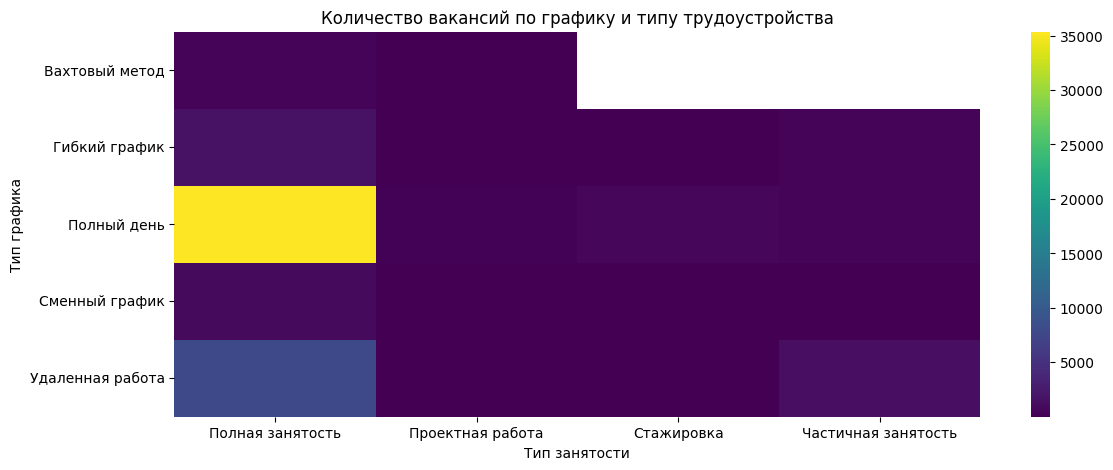

In [141]:
# результат запроса
df = pd.read_sql_query(query_4_4, connection) # используем метод read_sql_query, чтобы получить результаты запроса сразу в виде датафрейма
display(df)

pivot = df.pivot_table(
    values='Количество вакансий',
    index='Тип графика',
    columns='Тип занятости'
)
fig = plt.figure(figsize=(13, 5))
ax = sns.heatmap(data=pivot, cmap='viridis')
ax.set_title('Количество вакансий по графику и типу трудоустройства')

##### Вывод:
- В основном требуются работники с полным днем и занятостью
- На втором месте Полная занятость, но на Удаленной работе
- Остальные вариации, значительно меньше и примерно равномерно распределены

5. Напишите запрос, выводящий значения поля Требуемый опыт работы (experience) в порядке возрастания количества вакансий, в которых указан данный вариант опыта. 

In [146]:
# текст запроса
query_4_5 = f'''
SELECT 
    experience "Требуемый опыт работы", -- выбираем столбец schedule, задаём ему алиас "Требуемый опыт работы"
    COUNT(id) "Количество вакансий"     -- считаем колличство ваакансий, задаём ему алиас "Количество вакансий"
FROM vacancies
GROUP BY                                -- Группируем по experience
    experience
ORDER BY 2                              -- Сортируем по возрастанию колличество вакансий                              
            '''

In [151]:
# результат запроса
df = pd.read_sql_query(query_4_5, connection) # используем метод read_sql_query, чтобы получить результаты запроса сразу в виде датафрейма
display(df)

# Создаем круговую диаграмму для визуализации полученных данных
fig = px.pie(
    df,
    values='Количество вакансий',
    names='Требуемый опыт работы',
    height=600,
    width=700,
    title='Требуемый опыт работы в процентах',
)
fig.show() 

,Требуемый опыт работы,Количество вакансий
0,Более 6 лет,1337
1,Нет опыта,7197
2,От 3 до 6 лет,14511
3,От 1 года до 3 лет,26152


<img src = https://raw.githubusercontent.com/Balantre/New_octopus/main/project_2/graph/2.png >

##### Вывод:
- В основном требуются с небыольшим опытом работы специалисты 53,2 %
- В отсуствии опыта, то же есть шанс устроиться 14,6 %
- Можно прийти к выводу, что существует "кадровый голод", и требования к опыту работы снижаются 

#### Дполнительные исследования
Расчет средней зароботной платы в зависимости от востребованных городов по вакансиям

In [38]:
# текст запроса
query_4_6 = f'''
SELECT
    COUNT(v.ID) "Кол-во вакансий",                              -- выбираем столбец ID, задаём ему алиас cnt                  
    a.name "Город",                                             -- выбираем столбец name в таблице areas, задаём ему алиас "Город"
    ROUND(((AVG(salary_from))+(AVG(salary_to)))/2) "Средняя ЗП" -- расчитываем среднюю ЗП, задаём ему алиас "Средняя ЗП"
FROM
    public.vacancies v
LEFT JOIN public.areas a ON v.area_id=a.ID                      -- соединяем так, по скольку в запросе было количество вакансий, что бы ни одна не пропало, даже если регион не указан 
GROUP BY 2                                                      -- группируем по городу
ORDER BY 1 DESC                                                 -- cортируем по возрастанию колличество вакансий
LIMIT 30                                                                                       
            '''

# результат запроса
df = pd.read_sql_query(query_4_6, connection) # используем метод read_sql_query, чтобы получить результаты запроса сразу в виде датафрейма
display(df)

# Создаем круговую диаграмму для визуализации полученных данных
fig = px.pie(
    df,
    values='Средняя ЗП',
    names='Город',
    height=900,
    width=900,
    title='Средней зароботной платы в зависимости от востребованных городов',
)
fig.show()

,Кол-во вакансий,Город,Средняя ЗП
0,5333,Москва,137002.0
1,2851,Санкт-Петербург,108570.0
2,2112,Минск,100918.0
3,2006,Новосибирск,114422.0
4,1892,Алматы,74868.0
5,1698,Екатеринбург,98946.0
6,1670,Нижний Новгород,105327.0
7,1415,Казань,98030.0
8,1301,Краснодар,97814.0
9,1144,Самара,84521.0


<img src = https://raw.githubusercontent.com/Balantre/New_octopus/main/project_2/graph/3.png >

##### Вывод:
- Из выборки 30 городов с наиболшьшим числом вакансий, всего 8 городов с средней ЗП свыше 100 тыс., в основном это либо столицы, либо миллионники/значимые города, либо города с большим колличеством вакансий, что бы привлеч кандитатов высокой ЗП.  

Рсчет средней зароботной платы в зависимости от требуемый опыт работы

In [14]:
# текст запроса
query_4_7 = f'''
SELECT 
    experience "Требуемый опыт работы",                         -- выбираем столбец schedule, задаём ему алиас "Требуемый опыт работы"
    ROUND(((AVG(salary_from))+(AVG(salary_to)))/2) "Средняя ЗП" -- расчитываем среднюю ЗП, задаём ему алиас "Средняя ЗП"
FROM vacancies
GROUP BY                                                        -- Группируем по experience
    experience
ORDER BY 2 DESC                                                 -- Сортируем по убыванию ЗП                                                                                    
            '''

# результат запроса
df = pd.read_sql_query(query_4_7, connection) # используем метод read_sql_query, чтобы получить результаты запроса сразу в виде датафрейма
display(df)

# Создаем круговую диаграмму для визуализации полученных данных
fig = px.pie(
    df,
    values='Средняя ЗП',
    names='Требуемый опыт работы',
    height=900,
    width=900,
    title='Средней зароботной платы в зависимости от требуемый опыт работы',
)
fig.show()

,Требуемый опыт работы,Средняя ЗП
0,Более 6 лет,173987.0
1,От 3 до 6 лет,142259.0
2,От 1 года до 3 лет,80946.0
3,Нет опыта,45845.0


<img src = https://raw.githubusercontent.com/Balantre/New_octopus/main/project_2/graph/4.png >

##### Вывод:
- Как и предполагалось, ЗП зависит от опыта, чем больше опыт, тем больш ЗП

***

### Выводы по детальному анализу вакансий
- Требуются специалисты не только в РФ, но и в странах СНГ, и это мегаполисы либо какие-то значимые города, число вакансий и город может повличть на ЗП
- Примерно в 50 % вакансий указаны требвоания к ЗП в среднем диапозоне от 71 - 111 тыс. руб., на зарплатную вилку влияет опыт работы, так же регион/город, где размещена вакансия 
- Нужны специалисты с опытом от 1-3 лет, готовые работать полный день и с полной занятостью, но так же работадатели готовы и к тому, что работник будет работать удаленно 

# Юнит 5. Анализ работодателей

1. Напишите запрос, который позволит узнать, какие работодатели находятся на первом и пятом месте по количеству вакансий.

In [21]:
# текст запроса
query_5_1 = f'''
(SELECT
    e.name "Работодатели",                      -- выбираем столбец name в таблице areas, задаём ему алиас "Работодатели"
    COUNT(v.ID) "Кол-во вакансий"               -- выбираем столбец ID, задаём ему алиас "Кол-во вакансий"                  
FROM
    employers e
LEFT JOIN vacancies v ON v.employer_id=e.ID     -- соединяем так, по скольку в запросе речь шла про работодатлей, что даже если работодатель не выставлял вакансий, он все равно был в результате 
GROUP BY 1                                      -- группируем по работадателям
ORDER BY 2 DESC                                 -- cортируем по возрастанию колличество вакансий
LIMIT 1)                                        -- показываем первый результат
UNION ALL
(SELECT
    e.name,                                     -- выбираем столбец name в таблице areas, алиас не задаем,тк он указан в первой таблице
    COUNT(v.ID)                                 -- выбираем столбец ID, задаём ему алиас, алиас не задаем,тк он указан в первой таблице                  
FROM
    employers e
LEFT JOIN vacancies v ON v.employer_id=e.ID     -- соединяем так, по скольку в запросе речь шла про работодатлей, что даже если работодатель не выставлял вакансий, он все равно был в результате 
GROUP BY 1                                      -- группируем по работадателям
ORDER BY 2 DESC                                 -- cортируем по возрастанию колличество вакансий
OFFSET 4
LIMIT 1)                                        -- показываем 5 результат                                                                                   
            '''
            
# Для визуализации
query_5_1_v = f'''
SELECT
    e.name "Работодатели",                      -- выбираем столбец name в таблице areas, задаём ему алиас "Работодатели"
    COUNT(v.ID) "Кол-во вакансий"               -- выбираем столбец ID, задаём ему алиас "Кол-во вакансий"                  
FROM
    employers e
LEFT JOIN vacancies v ON v.employer_id=e.ID     -- соединяем так, по скольку в запросе речь шла про работодатлей, что даже если работодатель не выставлял вакансий, он все равно был в результате 
GROUP BY 1                                      -- группируем по работадателям
ORDER BY 2 DESC                                 -- cортируем по возрастанию колличество вакансий
LIMIT 10                                        -- показываем первые 10                                                          
            '''


In [23]:
# результат запроса
df = pd.read_sql_query(query_5_1, connection) # используем метод read_sql_query, чтобы получить результаты запроса сразу в виде датафрейма
display(df)

# Создаем датафрейм для визуализации
dfv = pd.read_sql_query(query_5_1_v, connection)

# Создаем круговую диаграмму для визуализации полученных данных
fig = px.pie(
    dfv,
    values='Кол-во вакансий',
    names='Работодатели',
    height=600,
    width=800,
    title='Работодатели по колличеству вакансий',
)
fig.show()

,Работодатели,Кол-во вакансий
0,Яндекс,1933
1,Газпром нефть,331


<img src = https://raw.githubusercontent.com/Balantre/New_octopus/main/project_2/graph/5.png >

##### Вывод:
- Лидером по размещению вакансий является Яндекс, тк это развивающийся IT гигант
- Так же можно обратить внгимание на первые 5 компаний, где тоже большая ставка на развитие информационных технологий 

2. Напишите запрос, который для каждого региона выведет количество работодателей и вакансий в нём.
Среди регионов, в которых нет вакансий, найдите тот, в котором наибольшее количество работодателей.


In [31]:
# текст запроса
query_5_2 = f'''
(with x as                                                                           -- создаем подзапрос для удобства соеденения
(SELECT
    a.id area_id,
    a.name area_name,
    count(e.id) cnt_employers
FROM
    areas a
LEFT JOIN employers e on a.id = e.area                                               -- используем LEFT JOIN, что бы сохранинть все регионы
GROUP BY a.id)
SELECT
    x.area_name "Регион",
    x.cnt_employers "Кол-во работадателе",
    COUNT(v.ID) "Кол-во вакансий"
FROM                                                                                 -- соеденяем временную таблицу с табалицей с вакансиями
    x
LEFT JOIN vacancies v on x.area_id = v.area_id
GROUP BY 1, 2
ORDER BY 2 DESC, 3 DESC
LIMIT 10)                                                                            -- выводим первые 10 результатов
UNION ALL
SELECT
    'Регион, в котором вакансий нет:',                                                -- объеденяем с импровизированной таблицей с значением в первый столбец для удобства понимания ответа на вопрос
    NULL,
    NULL
UNION ALL                                                                            -- объеденяем таблицу с ответом на вопрос Регион, в которых нет вакансий,в котором наибольшее количество работодателей
(with x as                                                                           -- создаем видоизмененую таблицу с фильтром по остустсвию вакансий
(SELECT
    a.id area_id,
    a.name area_name,
    count(e.id) cnt_employers
FROM
    areas a
LEFT JOIN employers e on a.id = e.area
GROUP BY a.id)
SELECT
    x.area_name "Регион",
    x.cnt_employers "Кол-во работадателе",
    COUNT(v.ID) "Кол-во вакансий"
FROM
    x
LEFT JOIN vacancies v on x.area_id = v.area_id
WHERE v.id is null                                                                   -- фильтруем по отсуствию вакансий
GROUP BY 1, 2
ORDER BY 2 DESC, 3 DESC
LIMIT 1)                                                                                   
            '''

In [35]:
# результат запроса
df = pd.read_sql_query(query_5_2, connection) # используем метод read_sql_query, чтобы получить результаты запроса сразу в виде датафрейма
display(df)


,Регион,Кол-во работадателе,Кол-во вакансий
0,Москва,5864.0,5333.0
1,Санкт-Петербург,2217.0,2851.0
2,Минск,1115.0,2112.0
3,Алматы,721.0,1892.0
4,Екатеринбург,609.0,1698.0
5,Новосибирск,573.0,2006.0
6,Казань,480.0,1415.0
7,Нижний Новгород,426.0,1670.0
8,Россия,410.0,0.0
9,Краснодар,409.0,1301.0


##### Вывод:
- Больше всего работодателей и вакансий в крупных городах.
- Так же, в некоторых регионах есть вакансии, но нет работодателей, т.е. у работодателя указан один регион, а поиск кандидатов в его компанию происходит в другом регионе.

3. Для каждого работодателя посчитайте количество регионов, в которых он публикует свои вакансии. Отсортируйте результат по убыванию количества.


In [43]:
# текст запроса
query_5_3 = f'''
SELECT
    e.name"Работодатель",                        -- выбираем столбец name в таблице areas, задаём ему алиас "Работодатели"
    COUNT(DISTINCT(v.area_id)) "Кол-во регионов" -- считаем колличество регионов в таблице вакансии, задаём ему алиас "Кол-во регионов"
FROM
    employers e
LEFT JOIN vacancies v on e.id = v.employer_id    -- соеденяем LEFT JOIN , для того, что бы все работадатели остались  
GROUP BY 1                                       -- групируем по названию работадателей
ORDER BY 2 DESC                                  -- сорутируем по убыванию 2 колонку
LIMIT 10                                         -- показываем первые 10 результатов                                                 
            '''

In [47]:
# результат запроса
df = pd.read_sql_query(query_5_3, connection) # используем метод read_sql_query, чтобы получить результаты запроса сразу в виде датафрейма
display(df)

# Создаем круговую диаграмму для визуализации полученных данных
fig = px.pie(
    df,
    values='Кол-во регионов',
    names='Работодатель',
    height=600,
    width=800,
    title='Количество регионов, в которых работодатели публикует свои вакансии',
)
fig.show()

# Дополнительное исследование сколько уникальных вакансий ищет Поляков Денис Иванович
query_5_3_1 = f'''
SELECT
    e.name"Работодатель",    
    COUNT(DISTINCT(v.name))    
FROM
    employers e
LEFT JOIN vacancies v on e.id = v.employer_id 
WHERE e.name = 'Поляков Денис Иванович'
GROUP BY e.name                                            
            '''

df = pd.read_sql_query(query_5_3_1, connection) # используем метод read_sql_query, чтобы получить результаты запроса сразу в виде датафрейма
display(df)

,Работодатель,Кол-во регионов
0,Яндекс,181
1,Ростелеком,152
2,Спецремонт,116
3,Поляков Денис Иванович,88
4,ООО ЕФИН,71
5,Совкомбанк,63
6,МТС,55
7,"ЭФКО, Управляющая компания",49
8,Почта России,48
9,КРОН,48


,Работодатель,count
0,Поляков Денис Иванович,2


<img src = https://raw.githubusercontent.com/Balantre/New_octopus/main/project_2/graph/6.png >

##### Вывод:
- Больше всего разнообразна география публикаций вакансий это Яндекс, что не удивительно, так как он вообще больше всего публикует вакансий и довольно крупная компания.
- Вообще существенно выделяються первые 3 компании, но очень странно. что среди крупных компаний, попал Поляков Денис Иванович, но в ходе дополнительно исследования выяснилось, что данный работадатель ищет всего 2 вакансии, по всем регионам 

4. Напишите запрос для подсчёта количества работодателей, у которых не указана сфера деятельности. 

In [49]:
# текст запроса
query_5_4 = f'''
SELECT 
    COUNT(DISTINCT e.id) 
FROM 
    employers e 
LEFT JOIN employers_industries ei ON e.id = ei.employer_id
WHERE ei.industry_id IS NULL
            '''

In [50]:
# результат запроса
df = pd.read_sql_query(query_5_4, connection) # используем метод read_sql_query, чтобы получить результаты запроса сразу в виде датафрейма
display(df)

,count
0,8419


##### Вывод:
- У трети работодателей не указана сфера дейтельности, это может быть по нескольким причинам, поле для заполнения данной информации либо не видят, либо не считают это важным для заполнения, возможно варианты предлагаемые системой не сооствествуют сфере деятельности компании.  

5. Напишите запрос, чтобы узнать название компании, находящейся на третьем месте в алфавитном списке (по названию) компаний, у которых указано четыре сферы деятельности. 

In [51]:
# текст запроса
query_5_5 = f'''
SELECT 
    e.name 
FROM 
    employers e 
LEFT JOIN employers_industries ei ON e.id = ei.employer_id
GROUP BY e.id
HAVING COUNT(ei.industry_id)=4
ORDER BY 1
OFFSET 2
LIMIT 1
            '''

In [52]:
# результат запроса
df = pd.read_sql_query(query_5_5, connection) # используем метод read_sql_query, чтобы получить результаты запроса сразу в виде датафрейма
display(df)

,name
0,2ГИС


##### Вывод:
Многие указывают несколлько сфер деятельности

6. С помощью запроса выясните, у какого количества работодателей в качестве сферы деятельности указана Разработка программного обеспечения.


In [53]:
# текст запроса
query_5_6 = f'''
SELECT 
    COUNT(DISTINCT(e.id)) "Кол-во работодателей"
FROM 
    employers e 
LEFT JOIN employers_industries ei ON e.id = ei.employer_id
LEFT JOIN industries i ON i.id=ei.industry_id
WHERE i.name='Разработка программного обеспечения'
            '''

In [54]:
# результат запроса
df = pd.read_sql_query(query_5_6, connection) # используем метод read_sql_query, чтобы получить результаты запроса сразу в виде датафрейма
display(df)

,Кол-во работодателей
0,3553


##### Вывод:
- Примерно 15% всех работодателей сфера деятельности Разработка програмного обеспечения

7. Для компании «Яндекс» выведите список регионов-миллионников, в которых представлены вакансии компании, вместе с количеством вакансий в этих регионах. Также добавьте строку Total с общим количеством вакансий компании. Результат отсортируйте по возрастанию количества.

Список городов-милионников надо взять [отсюда](https://ru.wikipedia.org/wiki/%D0%93%D0%BE%D1%80%D0%BE%D0%B4%D0%B0-%D0%BC%D0%B8%D0%BB%D0%BB%D0%B8%D0%BE%D0%BD%D0%B5%D1%80%D1%8B_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8). 

Если возникнут трудности с этим задание посмотрите материалы модуля  PYTHON-17. Как получать данные из веб-источников и API. 

In [3]:
# код для получения списка городов-милионников
# считываем таблицы со страницы в википедии
tables = pd.read_html(
  'https://ru.wikipedia.org/wiki/%D0%93%D0%BE%D1%80%D0%BE%D0%B4%D0%B0-%D0%BC%D0%B8%D0%BB%D0%BB%D0%B8%D0%BE%D0%BD%D0%B5%D1%80%D1%8B_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8'
   ) 
# tables содержит 12 таблиц (len(tables), нам нужна c индексом 1)
#print(len(tables))

df = pd.DataFrame(tables[1])
df.loc[(df['Город'] == 'Воронеж[a]'), 'Город'] = 'Воронеж'
cities = tuple(df['Город'])

In [14]:
# текст запроса
query_5_7 = f'''
with x as
(SELECT 
        a.name "Город",
        COUNT(v.id) "Количество вакансий"
FROM 
        vacancies v 
LEFT JOIN employers e on v.employer_id = e.id 
LEFT JOIN areas a on v.area_id = a.id
WHERE e.name = 'Яндекс' and a.name in {cities}
GROUP BY a.id 
ORDER BY 2)    -- формируем таблицу город - количество вакансий в этом городе
SELECT *
FROM 
        x
UNION ALL
SELECT 
        'Total',
        sum("Количество вакансий") -- данные, которые нужно посчитать, берутся из подзапроса
FROM 
        x
        '''

In [15]:
# результат запроса
df = pd.read_sql_query(query_5_7, connection) # используем метод read_sql_query, чтобы получить результаты запроса сразу в виде датафрейма
df

,Город,Количество вакансий
0,Омск,21.0
1,Челябинск,22.0
2,Красноярск,23.0
3,Волгоград,24.0
4,Ростов-на-Дону,25.0
5,Казань,25.0
6,Пермь,25.0
7,Самара,26.0
8,Уфа,26.0
9,Краснодар,30.0


##### Вывод:
- У Яндекса 1933 вакансии и только 485 в городах миллионников, таким образом яндекс ищит своих сотрудников не только в мегаполисах

***

### Выводы по анализу работодателей:
- Самый крупный работодатель это Яндекс
- Как это не странно не всегда требуються специалисты в крупных городов
- Так же около 23% кто указал сферу дейтельности Разработка програмного обеспечения

# Юнит 6. Предметный анализ

1. Сколько вакансий имеет отношение к данным?

Считаем, что вакансия имеет отношение к данным, если в её названии содержатся слова 'data' или 'данн'.

*Подсказка: Обратите внимание, что названия вакансий могут быть написаны в любом регистре.* 


In [19]:
# текст запроса
query_6_1 = f'''
SELECT 
    COUNT(*) "Кол-во вакансий"
FROM 
    vacancies 
WHERE name ILIKE '%data%' OR name ILIKE '%данн%' -- поскольку есть разный регсистр используем ключевое слово ILIKE 
            '''

In [20]:
# результат запроса
df = pd.read_sql_query(query_6_1, connection) # используем метод read_sql_query, чтобы получить результаты запроса сразу в виде датафрейма
df

,Кол-во вакансий
0,1771


##### Вывод:
1771 вакансий из 49197 имеют отношения к данным.



2. Сколько есть подходящих вакансий для начинающего дата-сайентиста? 
Будем считать вакансиями для дата-сайентистов такие, в названии которых есть хотя бы одно из следующих сочетаний:
* 'data scientist'
* 'data science'
* 'исследователь данных'
* 'ML' (здесь не нужно брать вакансии по HTML)
* 'machine learning'
* 'машинн%обучен%'

** В следующих заданиях мы продолжим работать с вакансиями по этому условию.*

Считаем вакансиями для специалистов уровня Junior следующие:
* в названии есть слово 'junior' *или*
* требуемый опыт — Нет опыта *или*
* тип трудоустройства — Стажировка.
 

In [27]:
# текст запроса
query_6_2 = f'''
SELECT 
    COUNT(*) "Кол-во вакансий"
FROM 
    vacancies 
WHERE                                              -- указываем критерии поиска
(name ILIKE '%data scientist%'                     -- поскольку есть разный регсистр используем ключевое слово ILIKE
OR name ILIKE '%data science%'
OR name ILIKE '%исследователь данных%'
OR (name LIKE '%ML%' AND name NOT ILIKE '%HTML%') 
OR name ILIKE '%machine learning%'
OR name ILIKE '%машинн%обучен%')
AND (name ILIKE '%junior%'                         -- прописываем критерии для junior
OR experience = 'Нет опыта'
OR schedule = 'Стажировка')
            '''

In [28]:
# результат запроса
df = pd.read_sql_query(query_6_2, connection) # используем метод read_sql_query, чтобы получить результаты запроса сразу в виде датафрейма
df

,Кол-во вакансий
0,51


##### Вывод:
Из 1771 вакансий всего 51 для junior

3. Сколько есть вакансий для DS, в которых в качестве ключевого навыка указан SQL или postgres?

** Критерии для отнесения вакансии к DS указаны в предыдущем задании.*

In [29]:
# текст запроса
query_6_3 = f'''
SELECT 
    COUNT(*) "Кол-во вакансий"
FROM 
    vacancies 
WHERE                                              -- указываем критерии поиска
(name ILIKE '%data scientist%'                     -- поскольку есть разный регсистр используем ключевое слово ILIKE
OR name ILIKE '%data science%'
OR name ILIKE '%исследователь данных%'
OR (name LIKE '%ML%' AND name NOT ILIKE '%HTML%') 
OR name ILIKE '%machine learning%'
OR name ILIKE '%машинн%обучен%')
AND (key_skills ILIKE '%SQL%' OR key_skills ILIKE '%postgres%') -- условие для проверки ключевого навыка
            '''

In [30]:
# результат запроса
df = pd.read_sql_query(query_6_3, connection) # используем метод read_sql_query, чтобы получить результаты запроса сразу в виде датафрейма
df

,Кол-во вакансий
0,201


##### Вывод:
Из 1771 вакансий всего 201 требуется знаие SQL

4. Проверьте, насколько популярен Python в требованиях работодателей к DS.Для этого вычислите количество вакансий, в которых в качестве ключевого навыка указан Python.

** Это можно сделать помощью запроса, аналогичного предыдущему.*

In [31]:
# текст запроса
query_6_4 = f'''
SELECT 
    COUNT(*) "Кол-во вакансий"
FROM 
    vacancies 
WHERE                                              -- указываем критерии поиска
(name ILIKE '%data scientist%'                     -- поскольку есть разный регсистр используем ключевое слово ILIKE
OR name ILIKE '%data science%'
OR name ILIKE '%исследователь данных%'
OR (name LIKE '%ML%' AND name NOT ILIKE '%HTML%') 
OR name ILIKE '%machine learning%'
OR name ILIKE '%машинн%обучен%')
AND key_skills ILIKE '%Python%'                    -- условие для проверки ключевого навыка
            '''

In [32]:
# результат запроса
df = pd.read_sql_query(query_6_4, connection) # используем метод read_sql_query, чтобы получить результаты запроса сразу в виде датафрейма
df

,Кол-во вакансий
0,351


##### Вывод:
Из 1771 вакансий всего 351 требуется знаие Python

5. Сколько ключевых навыков в среднем указывают в вакансиях для DS?
Ответ округлите до двух знаков после точки-разделителя.

In [33]:
# текст запроса
query_6_5 = f'''
WITH x as 
(SELECT 
    name,
    key_skills,
    (LENGTH(key_skills) - LENGTH(REPLACE(key_skills, CHR(9), ''))+1) cnt_word --подсчет количества слов в поле, разделенных знаком табуляции
FROM vacancies
WHERE                                                                        -- указываем критерии поиска
(name ILIKE '%data scientist%'                                               -- поскольку есть разный регсистр используем ключевое слово ILIKE
OR name ILIKE '%data science%'
OR name ILIKE '%исследователь данных%'
OR (name LIKE '%ML%' AND name NOT ILIKE '%HTML%') 
OR name ILIKE '%machine learning%'
OR name ILIKE '%машинн%обучен%'))
SELECT 
    round(avg(x.cnt_word),2) "Кол-во ключевых навыков"
FROM 
    x
            '''

In [36]:
# результат запроса
df = pd.read_sql_query(query_6_5, connection) # используем метод read_sql_query, чтобы получить результаты запроса сразу в виде датафрейма
df

,Кол-во ключевых навыков
0,6.41


6. Напишите запрос, позволяющий вычислить, какую зарплату для DS в **среднем** указывают для каждого типа требуемого опыта (уникальное значение из поля *experience*). 

При решении задачи примите во внимание следующее:
1. Рассматриваем только вакансии, у которых заполнено хотя бы одно из двух полей с зарплатой.
2. Если заполнены оба поля с зарплатой, то считаем зарплату по каждой вакансии как сумму двух полей, делённую на 2. Если заполнено только одно из полей, то его и считаем зарплатой по вакансии.
3. Если в расчётах участвует null, в результате он тоже даст null (посмотрите, что возвращает запрос select 1 + null). Чтобы избежать этой ситуацию, мы воспользуемся функцией [coalesce](https://postgrespro.ru/docs/postgresql/9.5/functions-conditional#functions-coalesce-nvl-ifnull), которая заменит null на значение, которое мы передадим. Например, посмотрите, что возвращает запрос `select 1 + coalesce(null, 0)`

Выясните, на какую зарплату в среднем может рассчитывать дата-сайентист с опытом работы от 3 до 6 лет. Результат округлите до целого числа. 

In [42]:
# текст запроса
query_6_6 = f'''
WITH s AS 
(SELECT 
    experience,
    CASE  WHEN (salary_from > 0) and (salary_to is null) THEN salary_from         --условие выборки на уровне "Какое поле взять?"
        WHEN (salary_from is Null) and (salary_to >0) THEN salary_to
        WHEN (salary_from >0) and (salary_to >0) THEN (salary_from+salary_to)/2
        ELSE NULL END AS salary
FROM 
    vacancies
WHERE                                                                        -- указываем критерии поиска
(name ILIKE '%data scientist%'                                               -- поскольку есть разный регсистр используем ключевое слово ILIKE
OR name ILIKE '%data science%'
OR name ILIKE '%исследователь данных%'
OR (name LIKE '%ML%' AND name NOT ILIKE '%HTML%') 
OR name ILIKE '%machine learning%'
OR name ILIKE '%машинн%обучен%'))
SELECT 
    experience "Опыт работы",
    round(avg(salary),0) "Средняя ЗП"
FROM 
    s
WHERE 
    salary is not NULL -- нам для анализа не нужны строки со сзначенем Null 
GROUP BY experience
            '''

In [43]:
# результат запроса
df = pd.read_sql_query(query_6_6, connection) # используем метод read_sql_query, чтобы получить результаты запроса сразу в виде датафрейма
df

,Опыт работы,Средняя ЗП
0,От 3 до 6 лет,243115.0
1,От 1 года до 3 лет,139675.0
2,Нет опыта,74643.0


##### Вывод:
- Довольно привлекательный результат, даже не смотря на остуствие опыта уровень ЗП хороший

***

### Выводы по предметному анализу:
- Изучили рынок вакансий с на позицию Data scientist'а
- Требования по вакансии как правило это около 6 навыков, включая SQL и Python.
- Так же определили, что есть вакансии и новичков, причем довольно с привлекательной ЗП  

# Общий вывод по проекту
При создание данного проекта мы научились ценную информацию из необработанных табличных данных с помощью агрегативных функций. Имея таблицу с названиями должностей и предлагаемыми на них зарплатами, уже можно разбить результаты на сегменты (например, по функционалу должности — разработчик, бухгалтер, водитель и т.д.) и для каждого сегмента вывести средние или минимальные\максимальные значения. А имея гораздо больше данных, чем в этом примере, открывается большое количество возможностей для анализа. Таким образом, нам удалось определить уровни предлагаемых зарплат в зависимости от стажа работы, количество вакансий по регионам, количество регионов, в которых каждый работодатель публикует вакансии и многое другое. 

На основе обработанных данных можно провести доп иследования:

- средняя\минимальная\максимальная зарплата по индустрии работодателя
- количество вакансий по индустриям
- средняя\минимальная\максимальная зарплата по регионам



В рамках данного проекта мы подружили SQL c Python, а также мы научились "добывать" ценную информацию из табличных данных с помощью группировок и агрегативных функций, сделали выводы по каждой выборке, провели некоторые уточняющие исследования, применили знания по визуализации данных с помощью графических возможностей библиотек Python и знания по получению данных с веб-источника. Проведены исследования и сделаны выводы по каждому этапу проекта